# Clustering Kmeans

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Data preparation and Cleansing
dataset = pd.read_csv('fifa20.csv')
df = pd.DataFrame(dataset, columns=['age','overall','potential', 'value_eur','wage_eur','pace', 'dribbling'])
df.dropna()
df = df[(df[['age', 'overall','potential', 'value_eur', 'wage_eur','pace', 'dribbling']] > 0).all(axis=1)] 

#jumlah data baru setelah di cleansing
print('Jumlah data baru =', df.shape)

Jumlah data baru = (16032, 7)


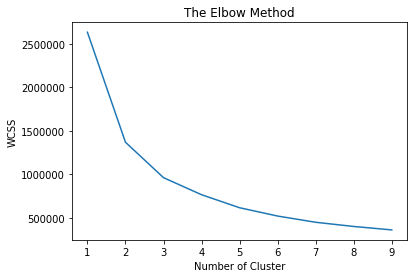

NameError: name 'read' is not defined

In [2]:
# ELBOW METHOD
listElbow = df.iloc[:, [2, 5]].values
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 30, random_state = 0)
    kmeans.fit(listElbow)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of Cluster')
plt.ylabel('WCSS')
plt.show()

x = []
y = []
for row in read:
    x.append(row[1])
    y.append(row[2])
x.pop(0)
y.pop(0)
print(x,y)

In [2]:
#mixmax Scalling
min_max_scaler = MinMaxScaler()
df = min_max_scaler.fit_transform(df[['pace', 'overall']])
df = pd.DataFrame(df)

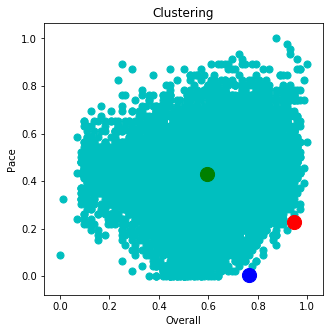

In [4]:
# Referensi https://benalexkeen.com
# inisiasi centroids
np.random.seed(200)
k = 3

centroids = {
  i+1: [np.random.rand(), np.random.rand()]
  for i in range(k)
}

#plot
fig = plt.figure(figsize=(5,5))
plt.scatter(df[0], df[1], color='c', s=50)
colormap = {1:'r', 2:'g', 3:'b'}
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colormap[i], s=200)
plt.title('Clustering')
plt.ylabel('Pace')
plt.xlabel('Overall')
plt.show()

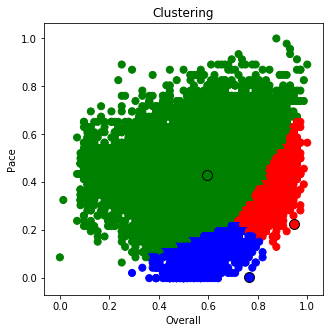

In [5]:
# Assignment centroid

def assignment(df2, centroids):
  for i in centroids.keys():
    # calculate distance to centroid -> sqrt((x1 - x2)^2 + (y1 - y2)^2)
    df['distance_from_{}'.format(i)] = (np.sqrt((df[0] - centroids[i][0]) ** 2 + (df[1] - centroids[i][1]) ** 2))
  centroid_distance = ['distance_from_{}'.format(i) for i in centroids.keys()]
  df['dekat'] = df.loc[:, centroid_distance].idxmin(axis=1)
  df['dekat'] = df['dekat'].map(lambda x: int(x.lstrip('distance_from_')))
  df['stat'] = df['dekat'].map(lambda x: colormap[x])
  return df

df = assignment(df, centroids)
df.head()

#plot
fig = plt.figure(figsize=(5, 5))
plt.scatter(df[0], df[1], color=df['stat'], s=50)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colormap[i], edgecolors='k', s=100)
plt.title('Clustering')
plt.ylabel('Pace')
plt.xlabel('Overall')
plt.show()

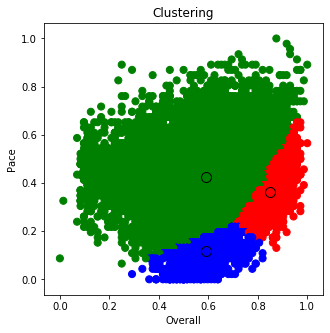

In [6]:
# update centroids

def update(centroids):
  for i in centroids.keys():
    centroids[i][0] = np.mean(df[df['dekat'] == i][0])
    centroids[i][1] = np.mean(df[df['dekat'] == i][1])
  return centroids

centroids = update(centroids)
    
#plot   
fig = plt.figure(figsize=(5, 5))
plt.scatter(df[0], df[1], color=df['stat'], s=50)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colormap[i], edgecolors='k', s=100)
plt.title('Clustering')
plt.ylabel('Pace')
plt.xlabel('Overall')
plt.show()

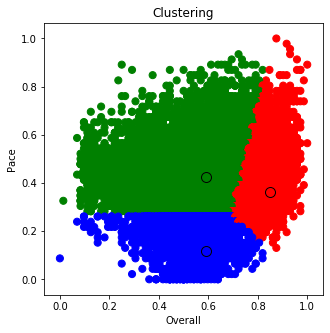

In [7]:
# update cluster
df = assignment(df, centroids)

#plot
fig = plt.figure(figsize=(5, 5))
plt.scatter(df[0], df[1], color=df['stat'], s=50)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colormap[i], edgecolors='k', s=100)
plt.title('Clustering')
plt.ylabel('Pace')
plt.xlabel('Overall')
plt.show()

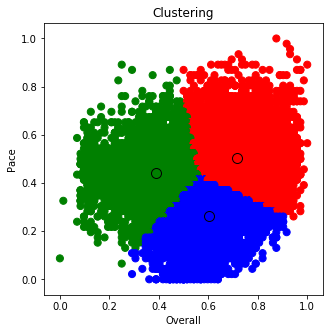

In [8]:
# mengulang update centroid sampe tidak berubah
while True:
  closest_centroids = df['dekat'].copy(deep=True)
  centroids = update(centroids)
  df = assignment(dataset, centroids)
  if closest_centroids.equals(df['dekat']):
    break
    
#plot
fig = plt.figure(figsize=(5, 5))
plt.scatter(df[0], df[1], color=df['stat'], s=50)
for i in centroids.keys():
  plt.scatter(*centroids[i], color=colormap[i], edgecolors='k', s=100)
plt.title('Clustering')
plt.ylabel('Pace')
plt.xlabel('Overall')
plt.show()